In [169]:
# Predict Linear Predictor vs Predict log-linear than inverse transform

In [170]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
lp1 = np.random.normal(0,10,100) + np.linspace(1,100,100)
lp = -.1*np.hstack((lp1,lp1,lp1))
y = np.exp(lp)

In [230]:
x1 = np.zeros(100)
x1[0] = 1
x = np.hstack((x1,x1,x1))

In [231]:
fit2 = sm.tsa.ARIMA(y, (1,1,2),exog = x).fit()

# Fitting Linear Model to Exponential Data

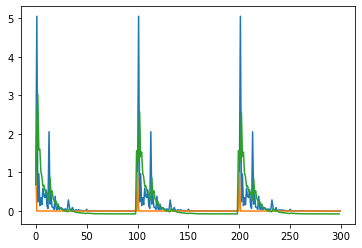

In [232]:
plt.plot(y)
plt.plot(x)
plt.plot(fit2.predict(typ = 'levels'))

### In Sample Fits Well Because Continuous Correction

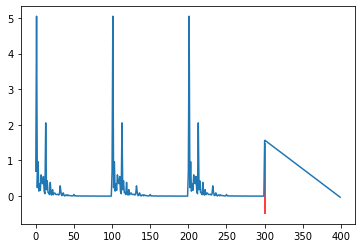

In [233]:
xf = np.zeros(100)
xf[0] = 1
y_ = fit2.predict(start=300, end = 399, exog = xf, typ = 'levels')

plt.plot(np.hstack((y,y_)))
plt.vlines(300, ymin = -.5, ymax = 1.5, colors='r')

### Out of Sample predictions look linear!

# Fitting on Linear Predictor

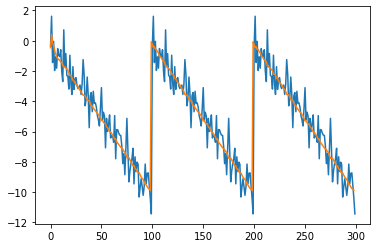

In [234]:
fit3 = sm.tsa.ARIMA(lp, (1,1,1),exog = x).fit()
plt.plot(lp)
plt.plot(fit3.predict(typ = 'levels'))

In [235]:
#fit3.summary()

[]

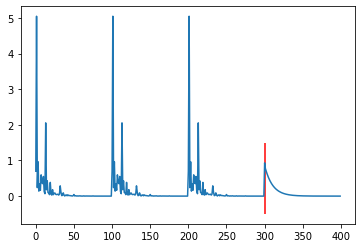

In [236]:
xf = np.zeros(100)
xf[0] = 1
lp_ = fit3.predict(start=300, end = 399, exog = xf, typ = 'levels')
y_ = np.exp(lp_)
plt.plot(np.hstack((y,y_)))
plt.vlines(300, ymin = -.5, ymax = 1.5, colors='r')
plt.plot()

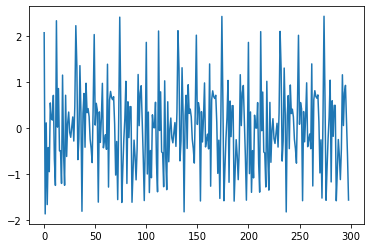

In [237]:
plt.plot(fit3.resid)

(array([20., 23., 31., 59., 52., 58., 28., 13.,  2., 13.]),
 array([-1.86391455, -1.43390771, -1.00390086, -0.57389401, -0.14388716,
         0.28611968,  0.71612653,  1.14613338,  1.57614023,  2.00614707,
         2.43615392]),
 <a list of 10 Patch objects>)

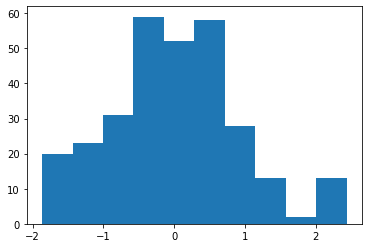

In [238]:
plt.hist(fit3.resid)

In [239]:
sigma = np.std(fit3.resid)
inv_trans = []
for mu in fit3.predict(typ = 'levels'):
    inv_trans.append(np.mean(np.exp(np.random.normal(mu,sigma,100))))
_inv_trans = np.exp(fit3.predict(typ = 'levels'))

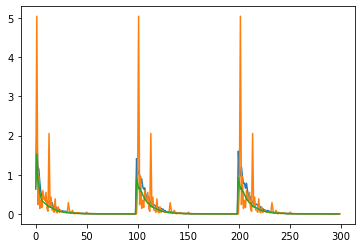

In [240]:
plt.plot(inv_trans)
plt.plot(y)
plt.plot(_inv_trans)

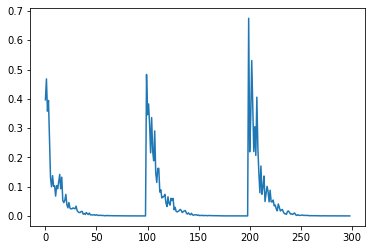

In [241]:
plt.plot(inv_trans - _inv_trans)